In [1]:
# Dependencies and Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the mouse data and the study results

mouse_metadata_df = pd.read_csv("Resources/Mouse_metadata.csv")
study_result_df = pd.read_csv("Resources/Study_results.csv")

In [3]:
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_result_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single DataFrame

mouse_metadata_study_result = pd.merge(study_result_df,mouse_metadata_df, how="left", on = "Mouse ID")

# Display the data table for preview

mouse_metadata_study_result.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.

mouse_metadata_study_result["Mouse ID"].nunique()

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = mouse_metadata_study_result.loc[mouse_metadata_study_result.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID.

duplicated_mouse_data = mouse_metadata_study_result.loc[mouse_metadata_study_result["Mouse ID"] == "g989"]
duplicated_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

df = mouse_metadata_study_result[mouse_metadata_study_result['Mouse ID'].isin(duplicates)==False]
df.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice in the clean DataFrame.

df["Mouse ID"].nunique()

248

In [11]:
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [12]:
df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_mean=df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median=df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_variance=df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_stdev=df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem=df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [14]:
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = {"mean" : tumor_mean,
                      "median":tumor_median,
                     "var":tumor_variance,
                      "std": tumor_stdev,
                      "sem": tumor_sem}
summary_statistics = pd.DataFrame(summary_statistics)
summary_statistics.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

agg_summary = df.groupby("Drug Regimen")["Tumor Volume (mm3)"]\
.agg(["mean","median","var","std","sem"])

agg_summary.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

timepoint_drugs=df.groupby("Drug Regimen")["Timepoint"].count()

In [17]:
timepoint_drugs.sort_values(ascending=False, inplace=True)

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

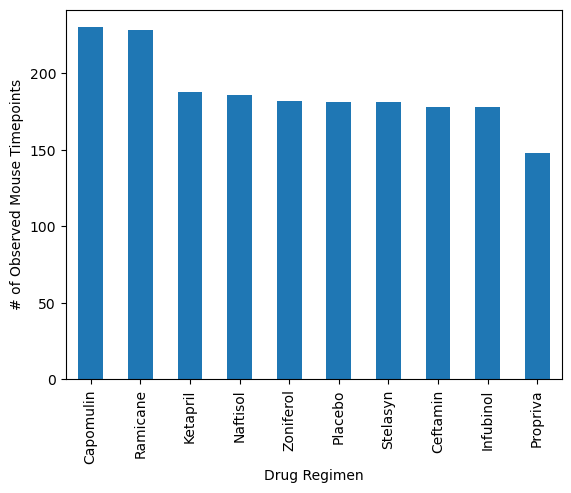

In [18]:
timepoint_drugs.plot(kind="bar", xlabel="Drug Regimen",ylabel="# of Observed Mouse Timepoints")

In [19]:
# Generate a bar plot showing the total number of rows 
# (Mouse ID/Timepoints) for each drug regimen using pyplot.

drugs_regimen = df["Drug Regimen"].value_counts()

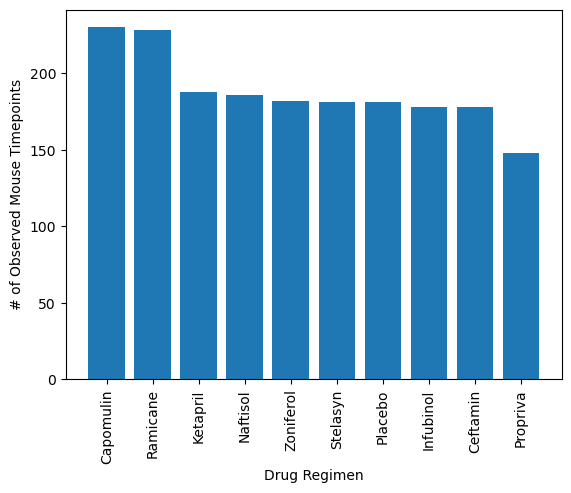

In [20]:
plt.bar(drugs_regimen.index.values, drugs_regimen.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

In [21]:
# Generate a pie plot showing the distribution of female versus male
# mice using Pandas

gender=df["Sex"].value_counts()

<Axes: ylabel='Sex'>

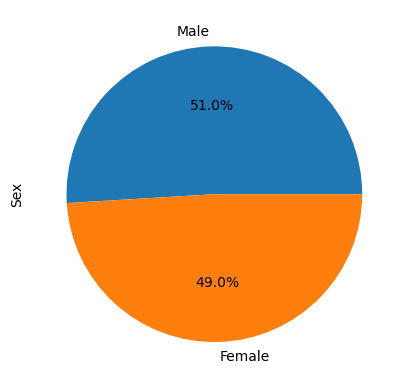

In [22]:
gender.plot(kind="pie", autopct="%1.1f%%")

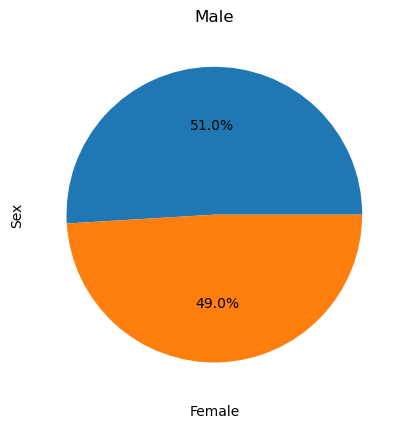

In [23]:
# Generate a pie plot showing the distribution of female versus male mice
# using pyplot

plt.pie(gender, autopct="%1.1f%%")
plt.xlabel("Female")
plt.ylabel("Sex")
plt.title("Male")
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
grouped_df=pd.DataFrame(df.groupby("Mouse ID")["Timepoint"].max())
grouped_df.rename(columns = {"Timepoint":"Last Timepoint"},inplace=True)
grouped_df.reset_index(inplace=True)
grouped_df

,Mouse ID,Last Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [25]:
df2=pd.merge(df,grouped_df, how="right", on=["Mouse ID","Mouse ID"])
df2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
0,a203,0,45.000000,0,Infubinol,Female,20,23,45
1,a203,5,48.508468,0,Infubinol,Female,20,23,45
2,a203,10,51.852437,1,Infubinol,Female,20,23,45
3,a203,15,52.777870,1,Infubinol,Female,20,23,45
4,a203,20,55.173336,1,Infubinol,Female,20,23,45
...,...,...,...,...,...,...,...,...,...
1875,z969,25,63.145652,2,Naftisol,Male,9,30,45
1876,z969,30,65.841013,3,Naftisol,Male,9,30,45
1877,z969,35,69.176246,4,Naftisol,Male,9,30,45
1878,z969,40,70.314904,4,Naftisol,Male,9,30,45


In [26]:
drugs_list = ["Capomulin","Ramicane","Infubinol", "Ceftamin"]
drugs_list

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [27]:
final_tumor_volume_list = []

In [28]:
for drugs in drugs_list:
    final_tumor_volume = df2.loc[df2["Drug Regimen"]==drugs,"Tumor Volume (mm3)"]
    final_tumor_volume_list.append(final_tumor_volume)
    quartiles = final_tumor_volume.quantile([0.25,0.5,0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q -1.5*(iqr)
    upper_bound = upper_q + 1.5*(iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound)|(final_tumor_volume > upper_bound)]
    print(f"{drugs} outliers are {outliers}")

Capomulin outliers are 1378    25.472143
1379    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane outliers are 796    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)


In [29]:
lower_bound

32.81891142624998

In [30]:
upper_bound

71.19095325625001